In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

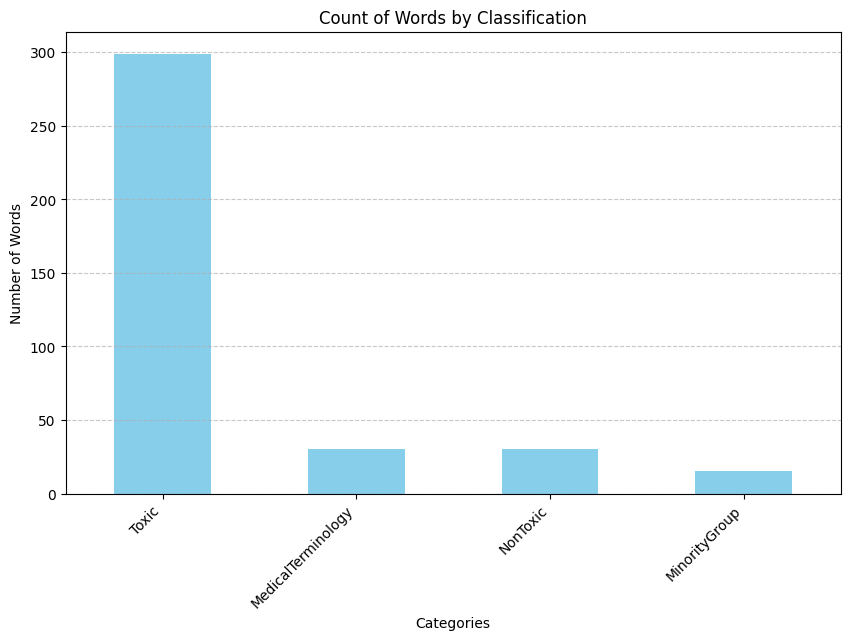

In [7]:
columns = ['Index', 'Word', 'Toxic', 'MedicalTerminology', 'NonToxic', 'MinorityGroup']

output_file_path = '../data/toxic-words.csv'
data = pd.read_csv(output_file_path)

classification_columns = columns[2:]
data[classification_columns] = data[classification_columns].astype(int)
category_counts = data[classification_columns].sum()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Words by Classification')
plt.xlabel('Categories')
plt.ylabel('Number of Words')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/7g/0sqgzqg91cg7_drxrd6npptr0000gn/T/ipykernel_13819/1098814788.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Word_Num'] = filtered_data['Word'].map(word_to_num_75)


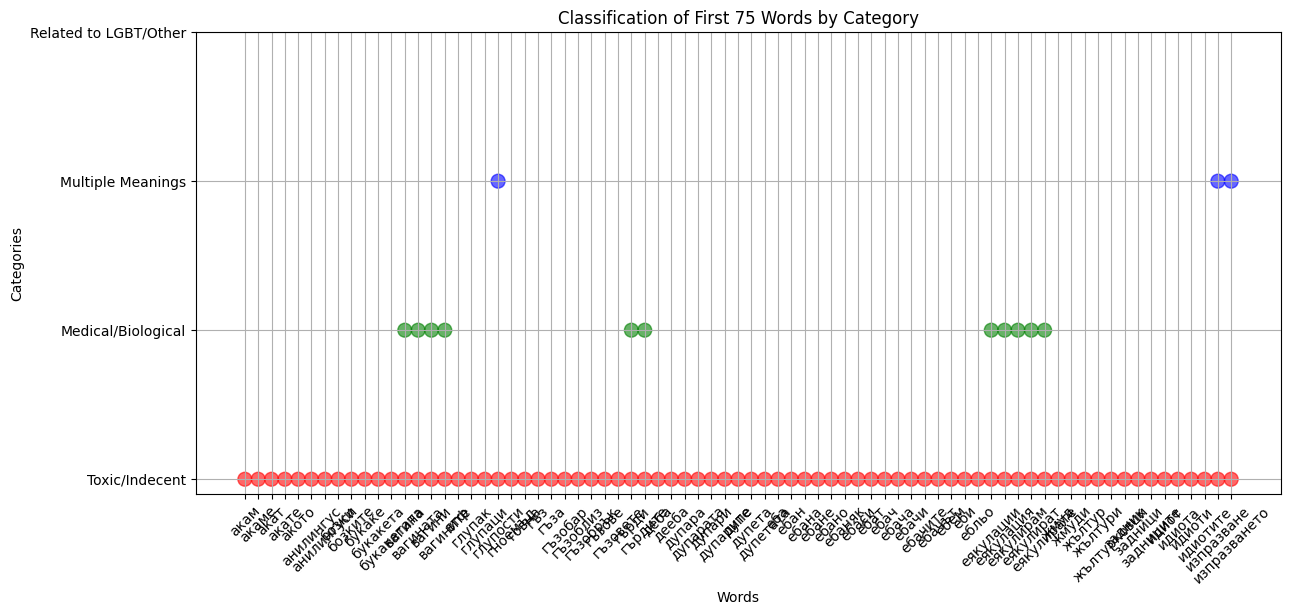

In [11]:
long_format = data.melt(id_vars=['Word'], value_vars=classification_columns, var_name='Category', value_name='Is_Classified')
long_format = long_format[long_format['Is_Classified'] == 1]

# Create a numeric representation of each word to plot on x-axis
word_to_num = {word: i for i, word in enumerate(data['Word'].unique(), 1)}
long_format['Word_Num'] = long_format['Word'].map(word_to_num)

# Mapping categories to colors
category_to_color = {
    'Toxic/Indecent': 'red',
    'Medical/Biological': 'green',
    'Multiple Meanings': 'blue',
    'Related to LGBT/Other': 'purple'
}
long_format['Color'] = long_format['Category'].map(category_to_color)

# Filter the long format DataFrame to include only the first 100 words
first_75_words = data['Word'].unique()[:75]
filtered_data = long_format[long_format['Word'].isin(first_75_words)]

# Create a numeric representation for the filtered words
word_to_num_75 = {word: i for i, word in enumerate(first_75_words, 1)}
filtered_data['Word_Num'] = filtered_data['Word'].map(word_to_num_75)

# Plotting for the first 75 words
plt.figure(figsize=(14, 6))
plt.scatter(filtered_data['Word_Num'], filtered_data['Category'], c=filtered_data['Color'], s=100, alpha=0.6)
plt.title('Classification of First 75 Words by Category')
plt.xlabel('Words')
plt.ylabel('Categories')
plt.xticks(ticks=np.arange(1, len(word_to_num_75) + 1), labels=word_to_num_75.keys(), rotation=45)
plt.yticks(ticks=classification_columns, labels=classification_columns)
plt.grid(True)
plt.show()


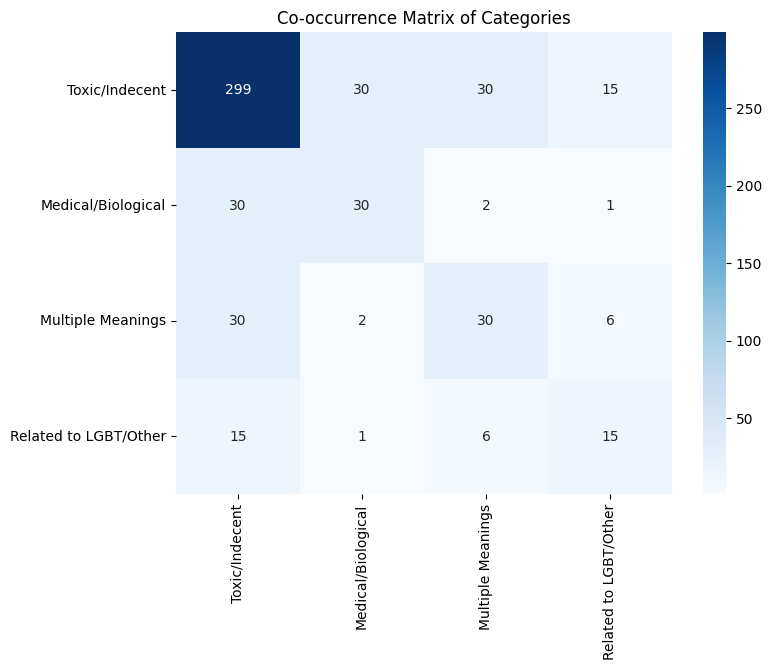

In [13]:
# Create a co-occurrence matrix
co_occurrence_matrix = data[classification_columns].T.dot(data[classification_columns])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Co-occurrence Matrix of Categories")
plt.show()

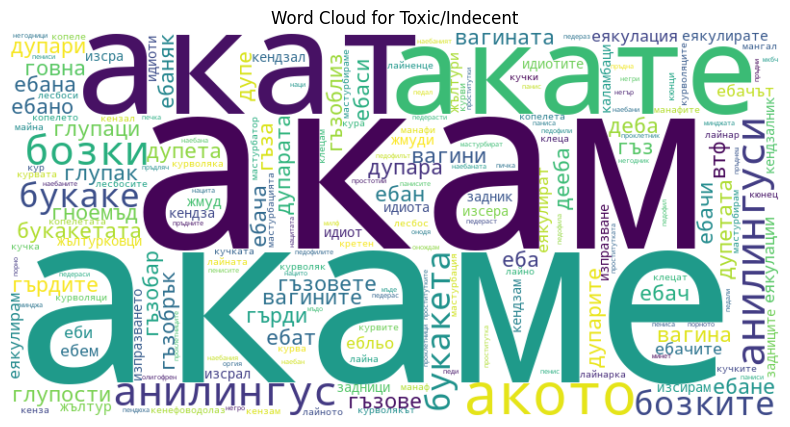

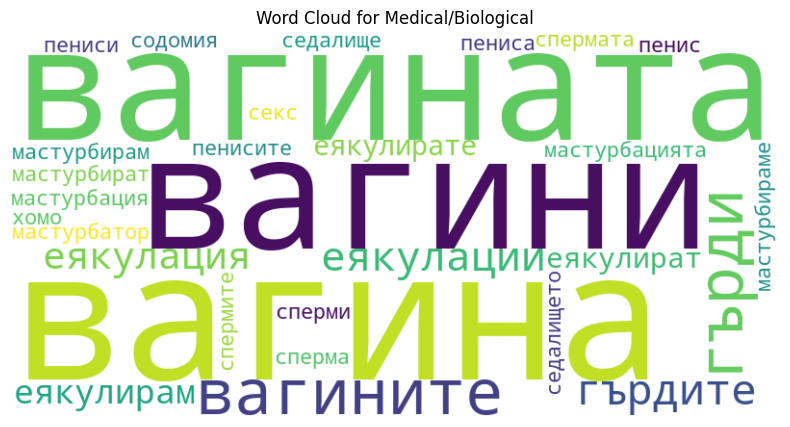

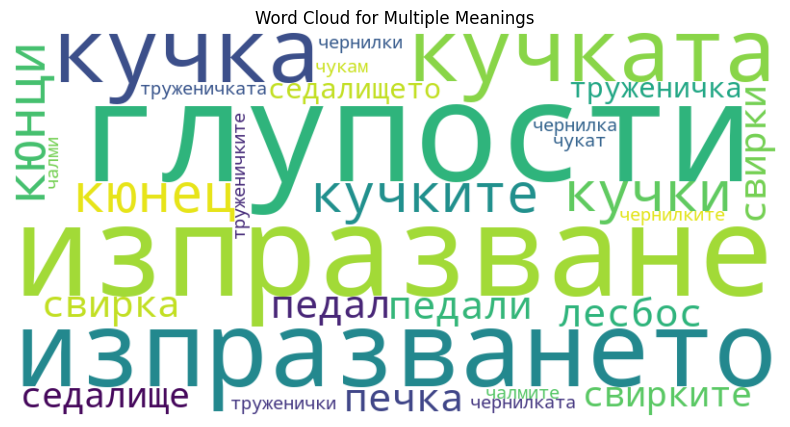

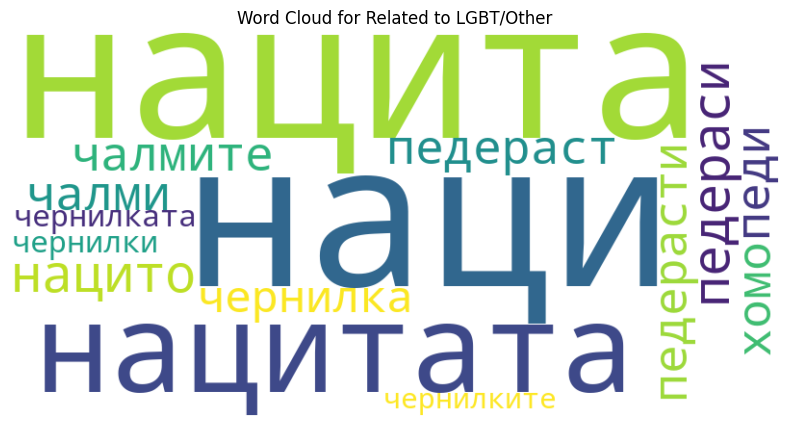

In [14]:
def generate_word_cloud(category):
    # Filter words for the category
    filtered_words = data[data[category] == 1]['Word']
    text = ' '.join(filtered_words)

    # Generate and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {category}")
    plt.show()

for category in classification_columns:
    generate_word_cloud(category)


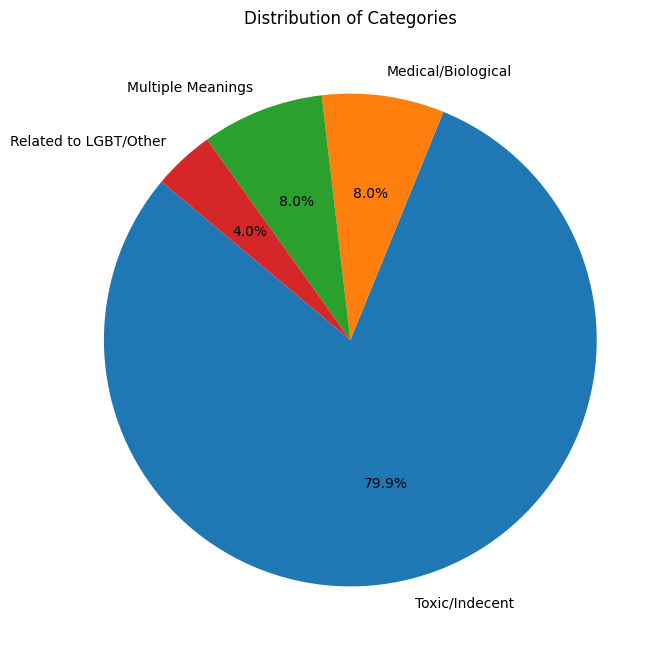

In [15]:
category_counts = data[classification_columns].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.show()


Populate framara dataset

In [19]:
# sentences_data = pd.read_csv('./bulgarian_sentences.csv')
label_columns = ['Toxic/Indecent', 'Medical/Biological', 'Multiple Meanings', 'Related to LGBT/Other']
# print(sentences_data)
file_path_toxic = './toxic-words.csv'
toxic_data = pd.read_csv(file_path_toxic)

# Display the first few rows of the second dataset
toxic_data.head(), toxic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Index                  299 non-null    int64 
 1   Word                   299 non-null    object
 2   Toxic/Indecent         299 non-null    int64 
 3   Medical/Biological     299 non-null    int64 
 4   Multiple Meanings      299 non-null    int64 
 5   Related to LGBT/Other  299 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.1+ KB


(   Index   Word  Toxic/Indecent  Medical/Biological  Multiple Meanings  \
 0      1   акам               1                   0                  0   
 1      2  акаме               1                   0                  0   
 2      3   акат               1                   0                  0   
 3      4  акате               1                   0                  0   
 4      5  акото               1                   0                  0   
 
    Related to LGBT/Other  
 0                      0  
 1                      0  
 2                      0  
 3                      0  
 4                      0  ,
 None)

In [29]:
data_path = './toxic-words.csv'
data = pd.read_csv(data_path)
sentences_data = pd.read_csv('./framar_forum_sentences.csv')

sentences_data['tokens'] = sentences_data['text'].str.lower().apply(lambda x: x.split())
toxic_dict = data.set_index('Word').to_dict('index')

label_columns = data.columns[2:].tolist()

def check_and_label(tokens):
    labels = np.zeros(len(label_columns))
    for token in tokens:
        if token in toxic_dict:
            labels += np.array([toxic_dict[token][col] for col in label_columns])
    return labels

sentences_data[label_columns] = pd.DataFrame(sentences_data['tokens'].apply(check_and_label).tolist(), index=sentences_data.index)
sentences_data.to_csv('./framar_labeled_sentences.csv', index=False)

Auto label proudBG scraped sentences

In [31]:
data_path = './toxic-words.csv'
data = pd.read_csv(data_path)
sentences_data = pd.read_csv('./proud_bg_sentences.csv')


sentences_data['tokens'] = sentences_data['text'].str.lower().apply(lambda x: x.split())

toxic_dict = data.set_index('Word').to_dict('index')


label_columns = data.columns[2:].tolist()

def check_and_label(tokens):
    labels = np.zeros(len(label_columns))
    for token in tokens:
        if token in toxic_dict:
            labels += np.array([toxic_dict[token][col] for col in label_columns])
    return labels

sentences_data[label_columns] = pd.DataFrame(sentences_data['tokens'].apply(check_and_label).tolist(), index=sentences_data.index)
sentences_data.to_csv('./minority_group_labeled_sentences.csv', index=False)
